 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [115]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [116]:
# Reading whale returns
whale_returns = Path("/Users/qiangehuang/Assignment-4/Resource/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/4124009193.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [117]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [118]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [119]:

# Reading algorithmic returns
algorithmic_returns = Path("/Users/qiangehuang/Assignment-4/Resource/algo_returns.csv")
algorithmic_returns_df = pd.read_csv(algorithmic_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algorithmic_returns_df.sort_index(ascending = True, inplace = True)
algorithmic_returns_df.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/2281908385.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algorithmic_returns_df = pd.read_csv(algorithmic_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [120]:

# Count nulls
algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [121]:
# Drop nulls
algorithmic_returns_df.dropna(inplace = True)
algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [122]:
# Reading S&P 500 Closing Prices
sp500 = Path("/Users/qiangehuang/Assignment-4/Resource/sp500_history.csv")
sp500_df = pd.read_csv(sp500, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/3777504968.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500, index_col="Date", parse_dates=True, infer_datetime_format=True)
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/3777504968.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [123]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [124]:
# Fix Data Types
# Assuming sp500_df is your DataFrame
sp500_df['Close'] = sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [125]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [126]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [127]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"S & P 500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [263]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns
combined_df = pd.concat([whale_returns, algorithmic_returns_df,sp500_daily_returns],axis ="columns",join = "inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579



---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## 
Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

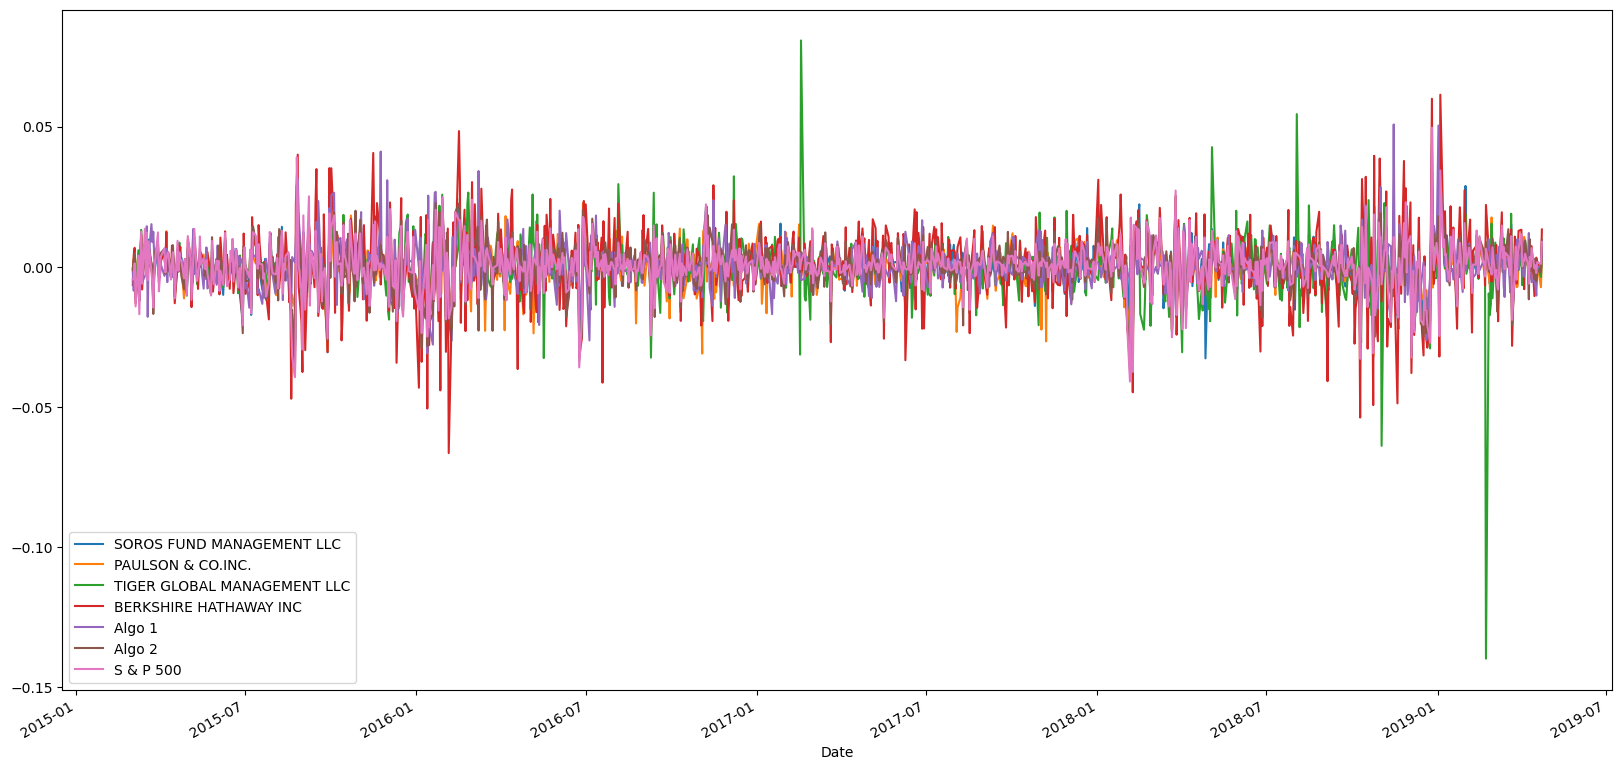

In [264]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### 

Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

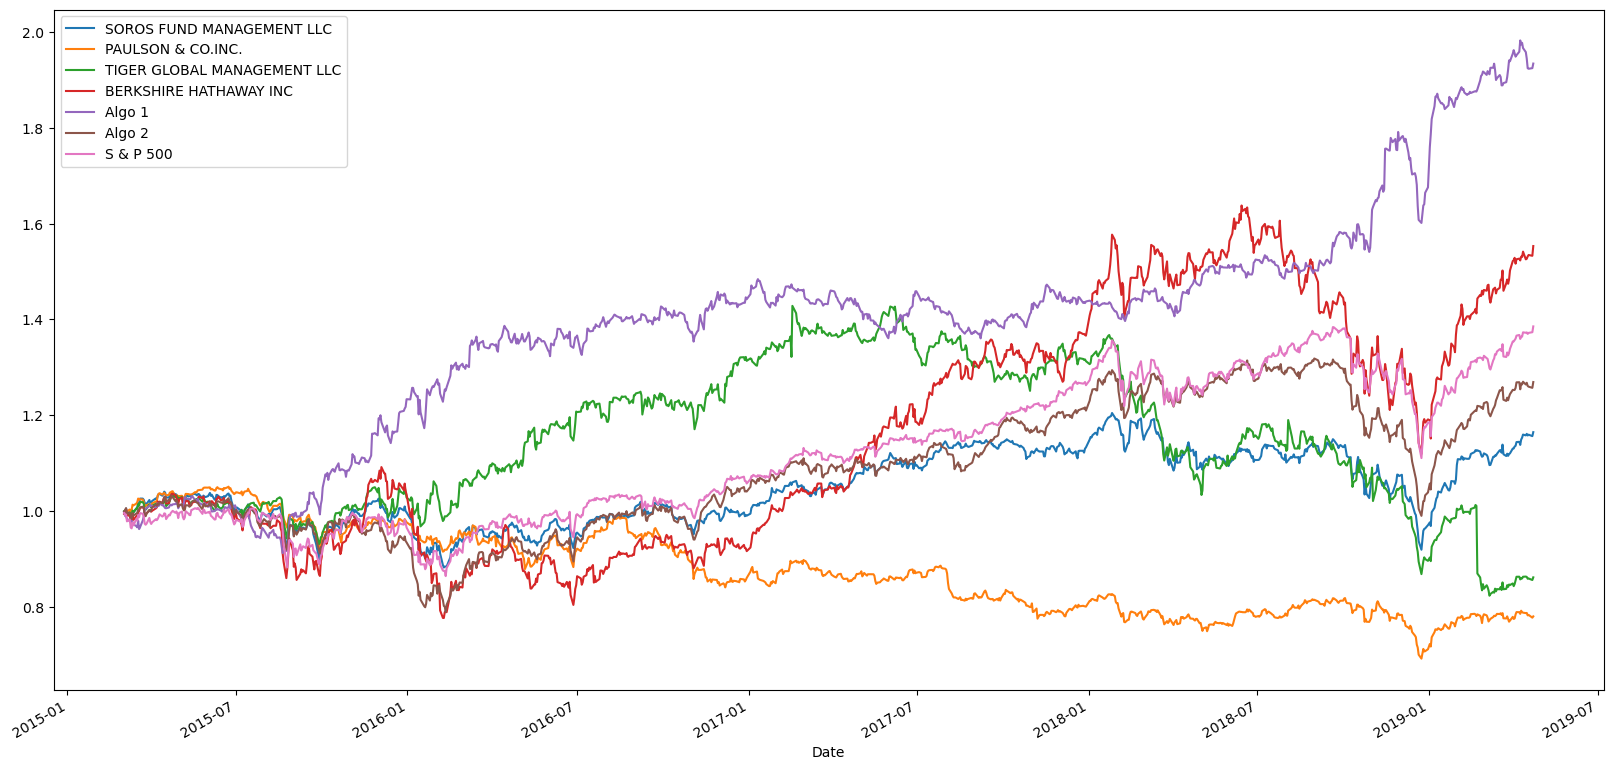

In [265]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### 
Create a box plot for each portfolio


<Axes: >

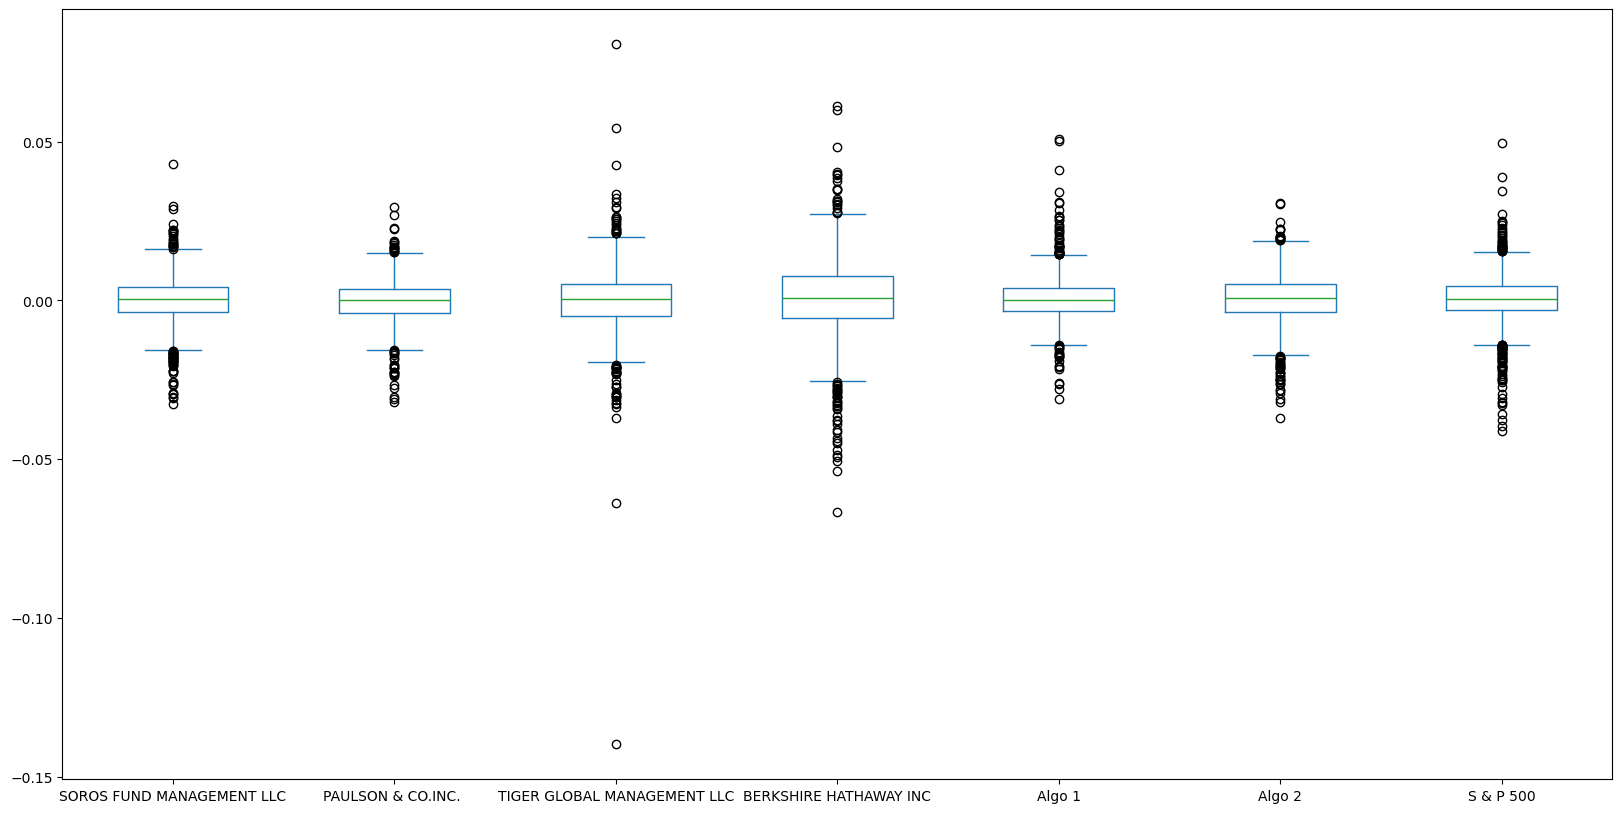

In [266]:
# Box plot to visually show risk
combined_df.plot.box(figsize = (20,10))

### 


Calculate Standard Deviations

In [267]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [268]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std.head()
# Determine which portfolios are riskier than the S&P 500
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S & P 500                      0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [269]:
# Calculate the annualized standard deviation (252 trading days)
combined_asd = combined_std*np.sqrt(252)


---

## 
Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

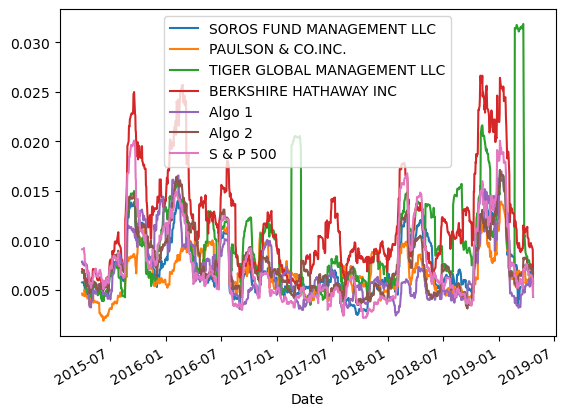

In [270]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling = combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_rolling.plot()

### Calculate and plot the correlation

<Axes: >

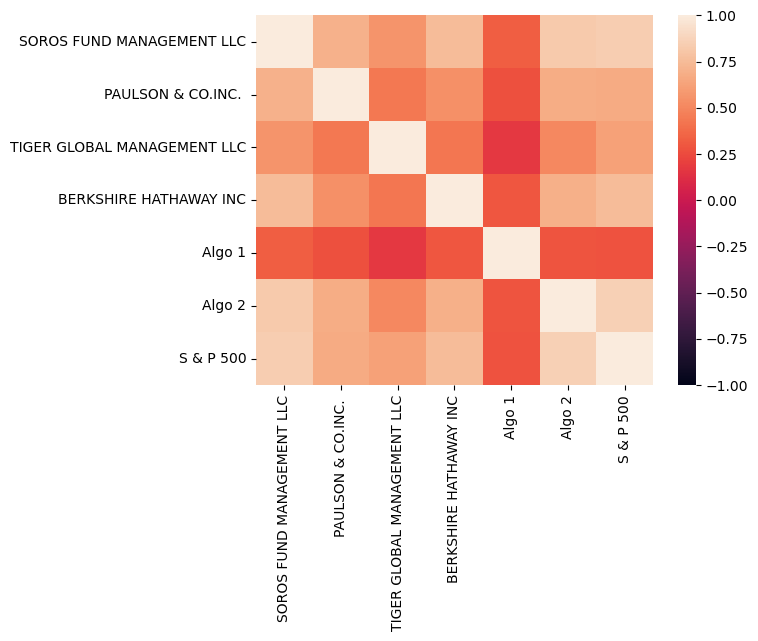

In [271]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

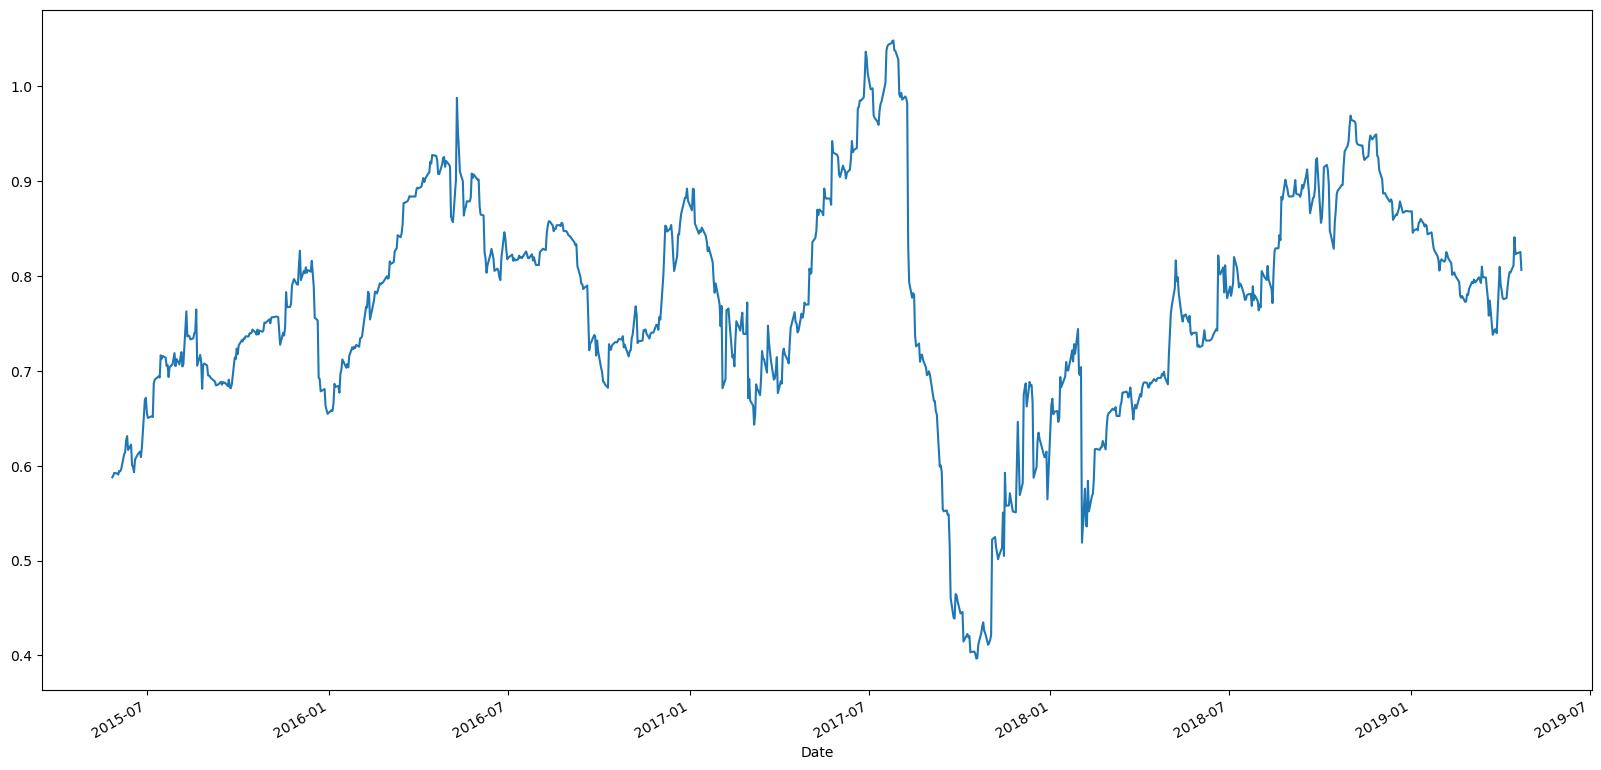

In [272]:
# Calculate covariance of a single portfolio
covariance=combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(combined_df['S & P 500'])
# Calculate variance of S&P 500
variance = combined_df['S & P 500'].rolling(window=60).var()
# Computing beta
beta = covariance/variance
# Plot beta trend
beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

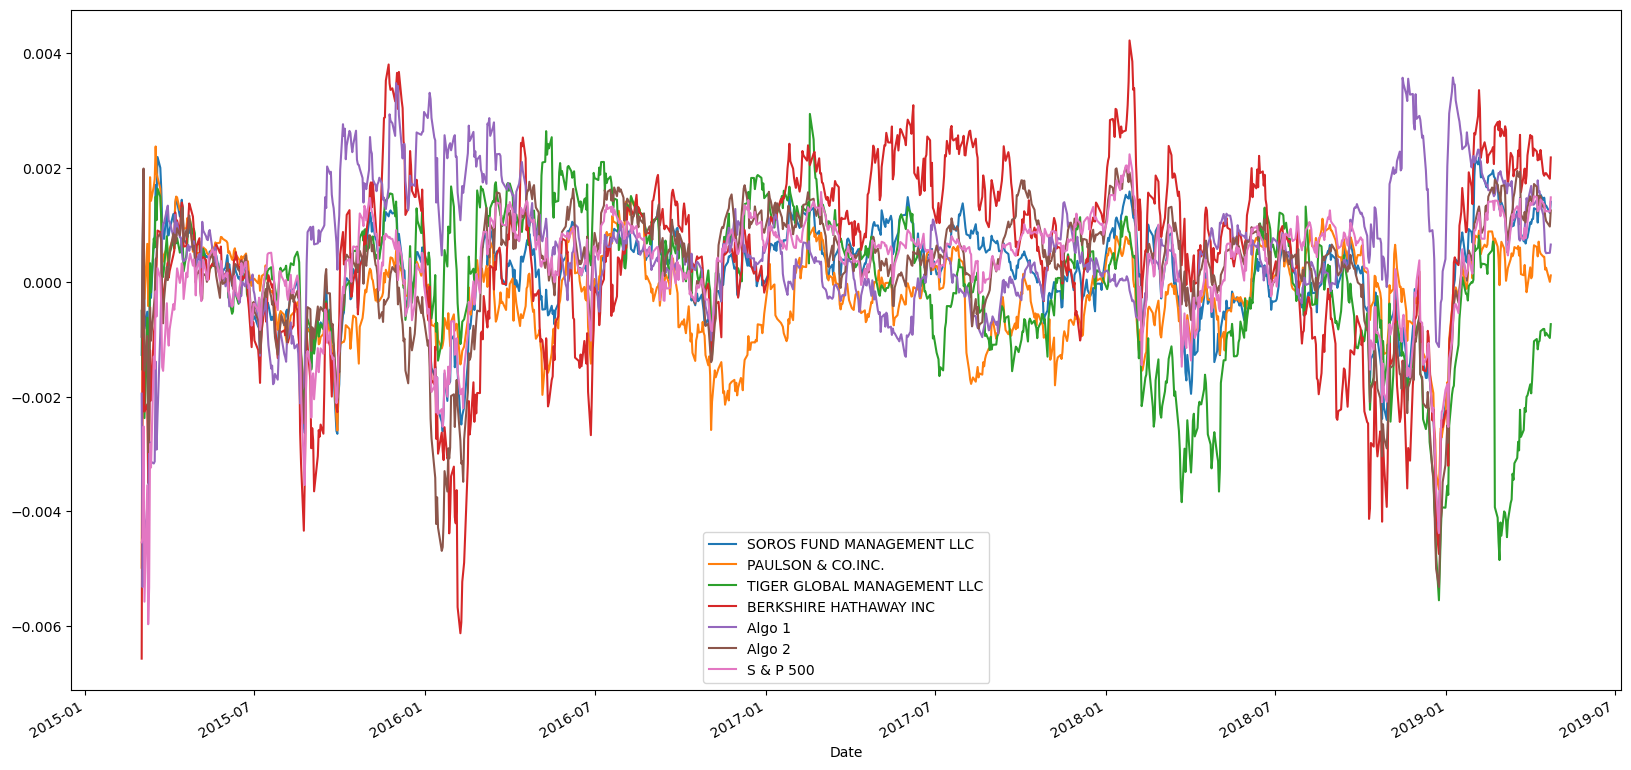

In [273]:
# Use `ewm` to calculate the rolling window
ewm_combined = combined_df.ewm(halflife = 21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [274]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252/combined_asd)
sharpe_ratios.sort_values(ascending = False)

Algo 1                         1.378648
S & P 500                      0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

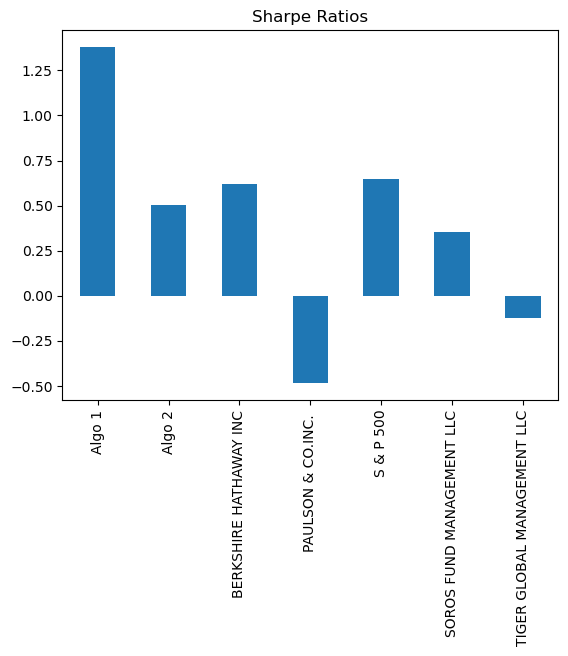

In [275]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms than both S&P 500 and the whales portfolios. Algo 2 underperforms than S&P 500. However, Algo 2 outperforms than the whales portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [276]:
# Reading data from 1st stock
cost_path = Path("/Users/qiangehuang/Assignment-4/Resource/cost_historical.csv")
cost_stock = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_stock.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_stock.drop(columns=['COST1'], axis=1,inplace = True)
cost_stock.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/1821191028.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_stock = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [277]:
# Reading data from 2nd stock
goog_path = Path("/Users/qiangehuang/Assignment-4/Resource/goog_historical.csv")
goog_stock = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_stock.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_stock.drop(columns=['GOOG1'], axis=1, inplace = True)
goog_stock.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/1235214654.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_stock = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [278]:
# Reading data from 3rd stock
aapl_path = Path("/Users/qiangehuang/Assignment-4/Resource/aapl_historical.csv")
aapl_stock = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_stock.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_stock.drop(columns=['AAPL1'], axis=1, inplace= True)
aapl_stock.head()

/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_41834/3038898863.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_stock = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [279]:
# Combine all stocks in a single DataFrame
combined_df_stocks = pd.concat([cost_stock,goog_stock,aapl_stock],axis ="columns",join = "inner")
combined_df_stocks.head()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-09,243.47,1162.38,200.72
2019-05-08,241.34,1166.27,202.90
2019-05-07,240.18,1174.10,202.86
2019-05-06,244.23,1189.39,208.48
2019-05-03,244.62,1185.40,211.75


In [280]:
# Reset Date index

In [281]:
# Reorganize portfolio data by having a column per symbol

In [282]:
# Calculate daily returns
daily_returns = combined_df_stocks.pct_change()
daily_returns.head()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,-0.008749,0.003347,0.010861
2019-05-07,-0.004806,0.006714,-0.000197
2019-05-06,0.016862,0.013023,0.027704
2019-05-03,0.001597,-0.003355,0.015685


In [283]:
# Drop NAs
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

COST    0
GOOG    0
AAPL    0
dtype: int64

In [284]:
# Display sample data
daily_returns.head()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-08,-0.008749,0.003347,0.010861
2019-05-07,-0.004806,0.006714,-0.000197
2019-05-06,0.016862,0.013023,0.027704
2019-05-03,0.001597,-0.003355,0.015685
2019-05-02,-0.007890,-0.019226,-0.012279


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [285]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weight_portfolio_returns = daily_returns.dot(weights)

# Display sample data
sample_data = pd.DataFrame(weight_portfolio_returns)
sample_data.head()

,0
Trade DATE,
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642
2019-05-02,-0.013131


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [286]:
# Join your returns DataFrame to the original returns DataFrame
combined_df_stocks = pd.concat([weight_portfolio_returns, combined_df], axis='columns', join='inner')
combined_df_stocks.rename(columns= {0: "Custom"},inplace = True )
combined_df_stocks.dropna(inplace=True)
combined_df_stocks.sort_index()
combined_df_stocks.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


In [289]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df_stocks.isnull().sum()

Custom                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S & P 500                      0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [290]:
# Calculate the annualized `std`
daily_std = combined_df_stocks.std()
annualized_asd = daily_std*np.sqrt(252)
annualized_asd.head()

Custom                         0.212687
SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling std'}>

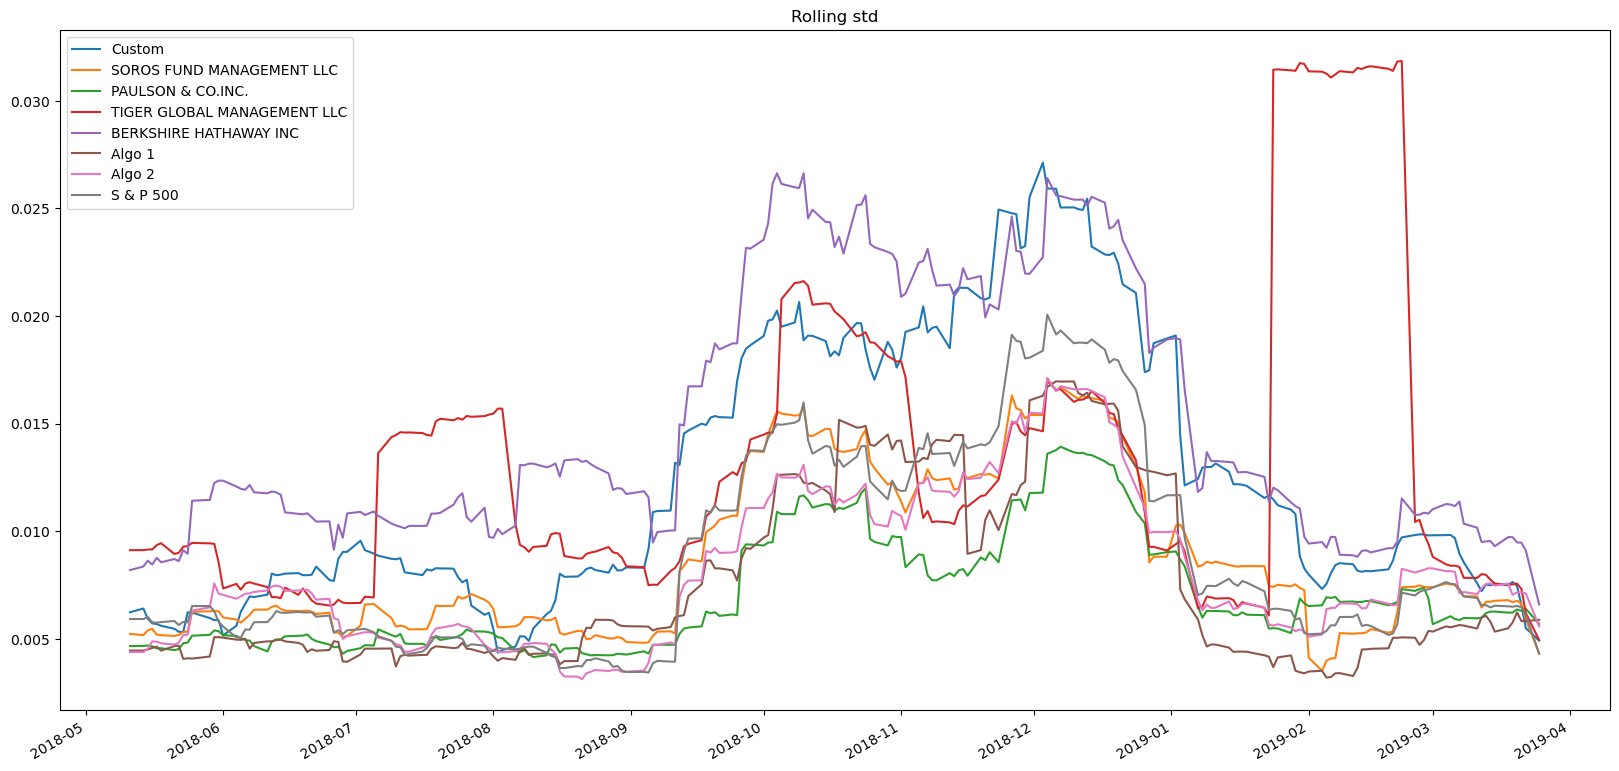

In [294]:
# Calculate rolling standard deviation
combined_df_stocks.rolling(window = 21).std()
# Plot rolling standard deviation
combined_df_stocks.rolling(window = 21).std().plot(figsize=(20,10), title = "Rolling std")

### Calculate and plot the correlation

<Axes: >

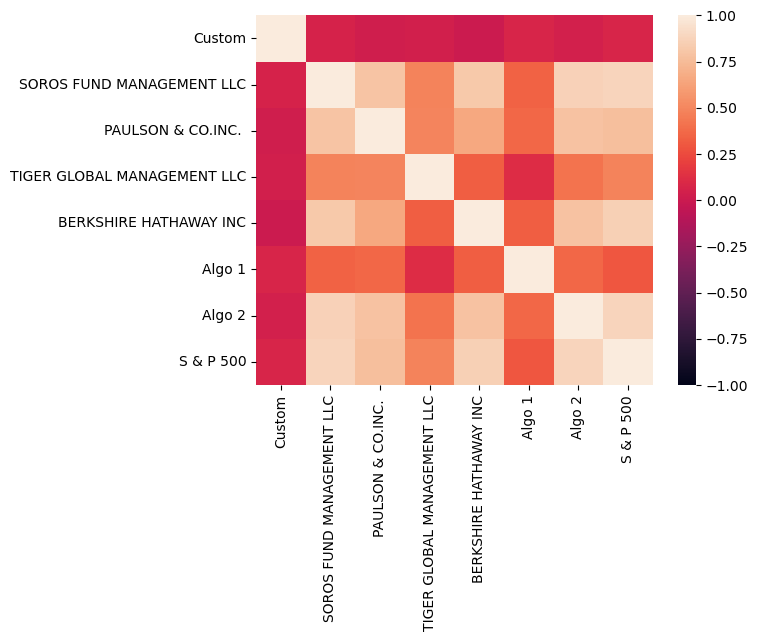

In [308]:
# Calculate and plot the correlation
correlation_combined = combined_df_stocks.corr()
sns.heatmap(correlation_combined, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta'}>

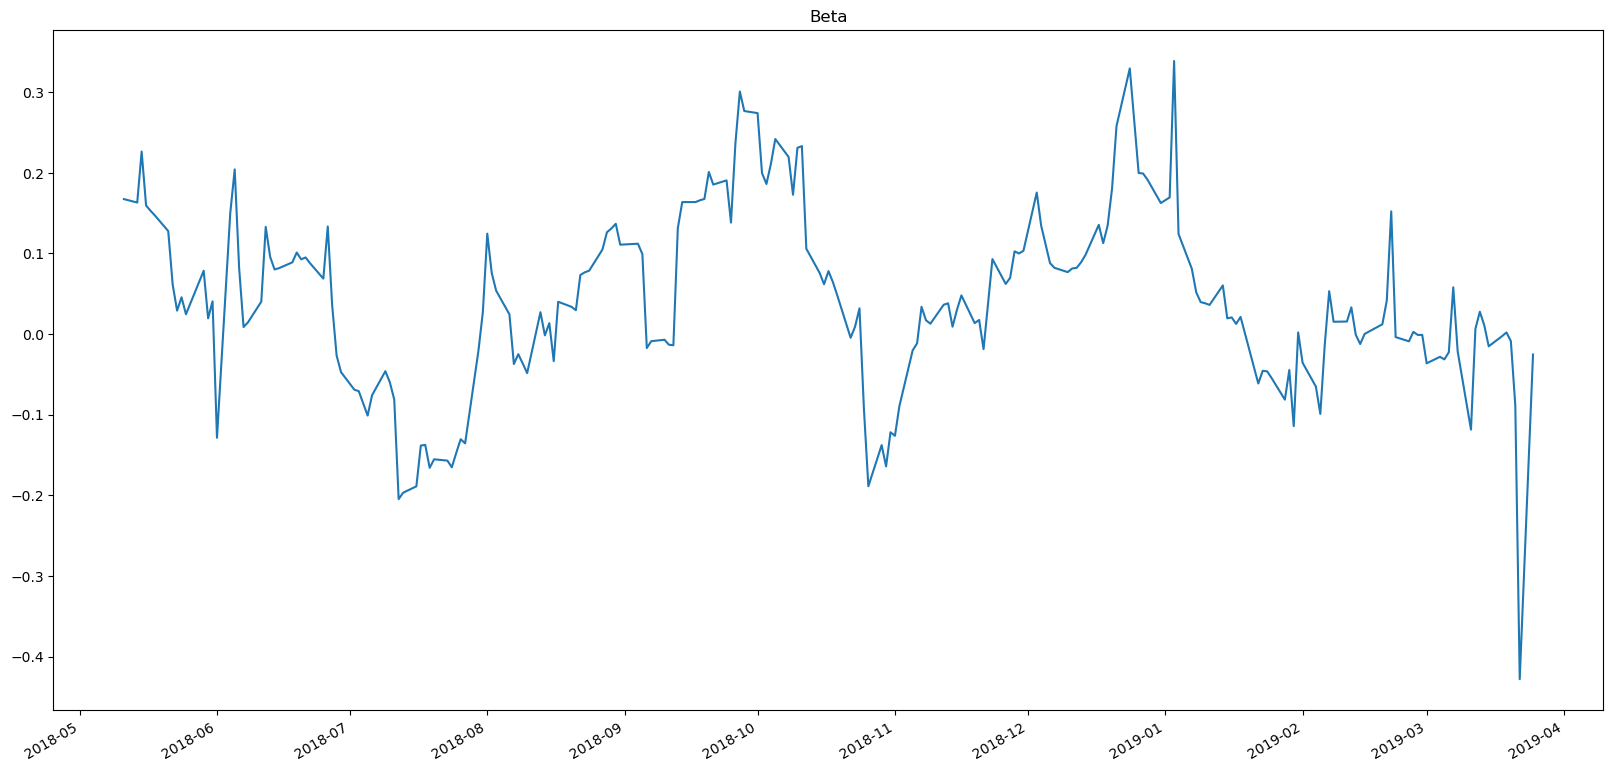

In [311]:
# Calculate and plot Beta
rolling_variance = combined_df_stocks['Custom'].rolling(window=21).var()
rolling_covariance = combined_df_stocks['Custom'].rolling(window=21).cov(combined_df_stocks['S & P 500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [304]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_combined = (combined_df_stocks.mean()*(252))/((combined_df_stocks).std()*np.sqrt(252))
sharpe_ratio_combined

Custom                        -0.614330
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
S & P 500                      0.595486
dtype: float64

<Axes: title={'center': 'Sharp Ratios'}>

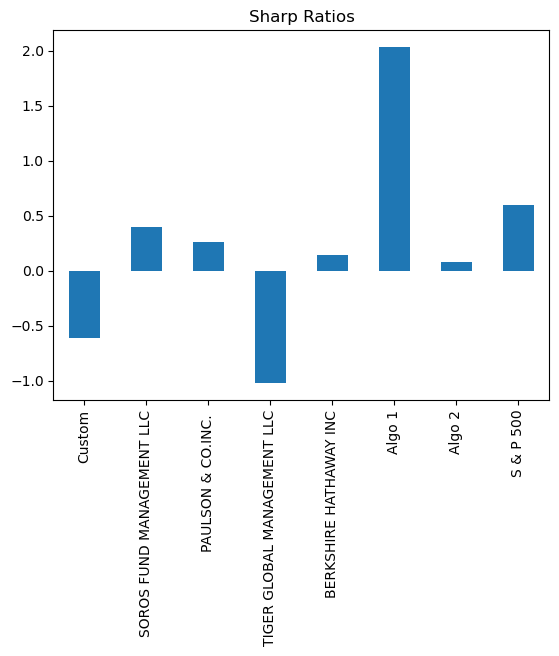

In [305]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_combined.plot(kind = 'bar',title = 'Sharp Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
According to the shape ratio, my portfolio is sub-optimal than the Algo1 and Algo 2.
the Algo 1 is better than Algo 2.